Patrick Gray (patrick.c.gray at duke) - https://github.com/patrickcgray

Chapter 7: Use xarray to handle 
===============================================================


In [6]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
# numpy 
import numpy as np
import dask
# xarray (very handy)
import xarray as xr
import rioxarray
import rasterio

In [7]:
da = xr.DataArray([9, 0, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

In [8]:
da = xr.DataArray([9, 0, 2, 1, 0], dims=['x'])
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

In [9]:
da = xr.DataArray([9, 0, 2, 1, 0],
                  dims=['x'],
                  coords={'x': [10, 20, 30, 40, 50]})
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 10 20 30 40 50

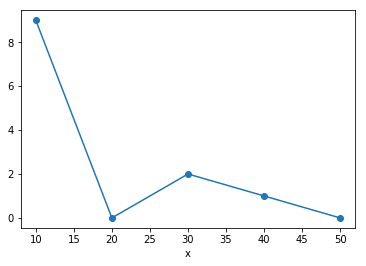

In [10]:
da.plot(marker='o')

In [13]:
! curl -O https://gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L3/GPM_3IMERGDF.06/2018/05/3B-DAY.MS.MRG.3IMERG.20180517-S000000-E235959.V06.nc4

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   573  100   573    0     0   2475      0 --:--:-- --:--:-- --:--:--  2480


In [3]:
xds = xr.open_dataset('../../SIF_tools/data/TROPOMI/nc_gridded/TROPO_SIF_06-2018.nc')

In [12]:
xds

<xarray.Dataset>
Dimensions:     (lat: 900, lon: 1800, time: 30)
Coordinates:
  * lon         (lon) float64 -179.9 -179.7 -179.5 -179.3 ... 179.5 179.7 179.9
  * lat         (lat) float64 -89.9 -89.7 -89.5 -89.3 ... 89.3 89.5 89.7 89.9
  * time        (time) datetime64[ns] 2018-06-01 2018-06-02 ... 2018-06-30
Data variables:
    SIF         (time, lat, lon) float32 ...
    dcSIF       (time, lat, lon) float32 ...
    relSIF      (time, lat, lon) float32 ...
    SIF_err     (time, lat, lon) float32 ...
    dcSIF_err   (time, lat, lon) float32 ...
    relSIF_err  (time, lat, lon) float32 ...
    cont        (time, lat, lon) float32 ...
    n_meas      (time, lat, lon) float64 ...

In [14]:
! ls

3B-DAY.MS.MRG.3IMERG.20180301-S000000-E235959.V06.nc4
3B-DAY.MS.MRG.3IMERG.20180517-S000000-E235959.V06.nc4
NOAA_NCDC_ERSST_v3b_SST.nc
argo_float_4901412.npz
chapter_0_introduction.ipynb
chapter_1_rasterio.ipynb
chapter_2_indices.ipynb
chapter_3_visualization.ipynb
chapter_4_vector.ipynb
chapter_5_classification.ipynb
chapter_6_neural_networks.ipynb
chapter_7_earth_engine_oceanography.ipynb
chapter_8_xarray_netcdfs.ipynb


In [17]:
ds = xr.open_dataset('3B-DAY.MS.MRG.3IMERG.20180322-S000000-E235959.V06.nc4')
ds

<xarray.Dataset>
Dimensions:                    (lat: 1800, lon: 3600, nv: 2, time: 1)
Coordinates:
  * lon                        (lon) float32 -179.95 -179.84999 ... 179.95
  * lat                        (lat) float32 -89.95 -89.85 ... 89.95001
  * time                       (time) object 2018-03-22 00:00:00
Dimensions without coordinates: nv
Data variables:
    precipitationCal           (time, lon, lat) float32 ...
    precipitationCal_cnt       (time, lon, lat) int8 ...
    precipitationCal_cnt_cond  (time, lon, lat) int8 ...
    HQprecipitation            (time, lon, lat) float32 ...
    HQprecipitation_cnt        (time, lon, lat) int8 ...
    HQprecipitation_cnt_cond   (time, lon, lat) int8 ...
    randomError                (time, lon, lat) float32 ...
    randomError_cnt            (time, lon, lat) int8 ...
    time_bnds                  (time, nv) object ...
Attributes:
    BeginDate:       2018-03-22
    BeginTime:       00:00:00.000Z
    EndDate:         2018-03-22
    EndT

In [21]:
precip = ds.HQprecipitation
precip

<xarray.DataArray 'HQprecipitation' (time: 1, lon: 3600, lat: 1800)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.95 -179.84999 -179.75 ... 179.85002 179.95
  * lat      (lat) float32 -89.95 -89.85 -89.75 ... 89.75 89.850006 89.95001
  * time     (time) object 2018-03-22 00:00:00
Attributes:
    units:      mm
    long_name:  Daily accumulated High Quality precipitation from all availab...

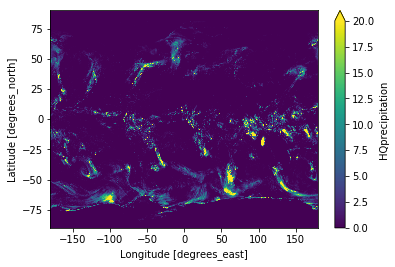

In [34]:
precip.mean(dim='time').plot(x="lon", y="lat", vmin=0, vmax=20)

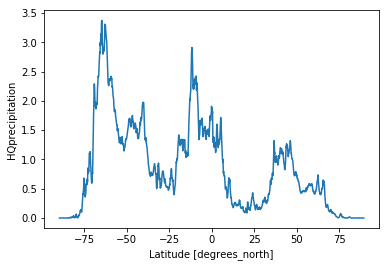

In [24]:
precip.mean(dim=('time', 'lon')).plot()

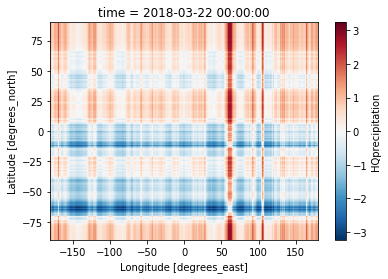

In [31]:
precip_zonal_time_mean = precip.mean(dim=('time', 'lon'))
(precip.mean(dim='lat') - precip_zonal_time_mean).T.plot()

In [44]:
import cartopy.crs as ccrs

# Draw coastlines of the Earth
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(c="white") 
precip.mean(dim='time').plot(x="lon", y="lat", vmin=0, vmax=20)
plt.show()

AttributeError: Unknown property c

<Figure size 1008x432 with 2 Axes>

## Final Wrap-up and Next Steps

Congrats on making it this far! Here we downloaded MODIS SST imagery from Google Earth Engine, cleaned this data, and analyzed it for seasonality and trends. 

#### What's next?

Now that you've gotten a taste of using python for GIS and remote sensing we recommend keeping up with the top journals, playing with other labs like this one, and explore the whole python geospatial community. Some examples:
- follow some top research journals such as [Remote Sensing of Environment](https://www.journals.elsevier.com/remote-sensing-of-environment), [IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing](https://ieeexplore.ieee.org/xpl/RecentIssue.jsp?punumber=4609443), and [ISPRS Journal of Photogrammetry and Remote Sensing](https://www.journals.elsevier.com/isprs-journal-of-photogrammetry-and-remote-sensing)
- explore other good notebooks and tutorials like https://github.com/planetlabs/notebooks
- play with all the amazing datasets out there (e.g. Earth on AWS https://aws.amazon.com/earth/)
- self-teach all the other cool open source python geospatial tools: https://github.com/sacridini/Awesome-Geospatial#python 
